# Dependencies

In [1]:
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold

# Set seeds to make the experiment more reproducible.
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed = 0
seed_everything(seed)

%matplotlib inline
sns.set(style="white")
warnings.filterwarnings("ignore")

# Load data

In [2]:
data_1 = pd.read_csv('../data/dr_data_1/train.csv')
data_1 = data_1.loc[:, ~data_1.columns.str.contains('Unnamed')]

data_2 = pd.read_csv('../data/dr_data_2/train.csv')
data_2 = data_2.loc[:, ~data_2.columns.str.contains('Unnamed')]

test = pd.read_csv('../data/dr_test/test.csv')
test = test.loc[:, ~test.columns.str.contains('Unnamed')]

data_1['data'] = '1'
data_2['data'] = '2'

data_1["id_code"] = data_1["id_code"].apply(lambda x: x + ".png")
data_2["id_code"] = data_2["id_code"].apply(lambda x: x + ".jpeg")
test["id_code"] = test["id_code"].apply(lambda x: x + ".jpeg")

test.to_csv("../output/test.csv")
diag_0 = data_2[data_2['diagnosis'] == 0].sample(frac=0.3, random_state=seed)
diag_oth = data_2[data_2['diagnosis'] != 0]
data_2 = diag_0.append(diag_oth)
train_df = data_2.append(data_1)
display(train_df.head())
train_df = train_df.reset_index()


,id_code,diagnosis,data
4707,11121_right.jpeg,0,2
20323,30914_right.jpeg,0,2
13301,21916_right.jpeg,0,2
13571,22283_right.jpeg,0,2
6865,13832_right.jpeg,0,2


# 5-Fold split

In [3]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

for fold_n, (trn_idx, val_idx) in enumerate(folds.split(train_df, train_df['diagnosis'])):
    print('Fold: %s, Train size: %s, Validation size %s' % 
          (fold_n, len(trn_idx), len(val_idx)))
    train_df[('fold_%s' % fold_n)] = 0
    train_df[('fold_%s' % fold_n)].loc[trn_idx] = 'train'
    train_df[('fold_%s' % fold_n)].loc[val_idx] = 'validation'
    
# train_df = data_2.append(data_1)
print(len(train_df))
display(train_df.head())

Fold: 0, Train size: 15504, Validation size 3877
Fold: 1, Train size: 15505, Validation size 3876
Fold: 2, Train size: 15505, Validation size 3876
Fold: 3, Train size: 15505, Validation size 3876
Fold: 4, Train size: 15505, Validation size 3876
19381


,index,id_code,diagnosis,data,fold_0,fold_1,fold_2,fold_3,fold_4
0,4707,11121_right.jpeg,0,2,train,train,train,train,validation
1,20323,30914_right.jpeg,0,2,validation,train,train,train,train
2,13301,21916_right.jpeg,0,2,train,train,train,train,validation
3,13571,22283_right.jpeg,0,2,validation,train,train,train,train
4,6865,13832_right.jpeg,0,2,validation,train,train,train,train


# Train & Validation label distribution

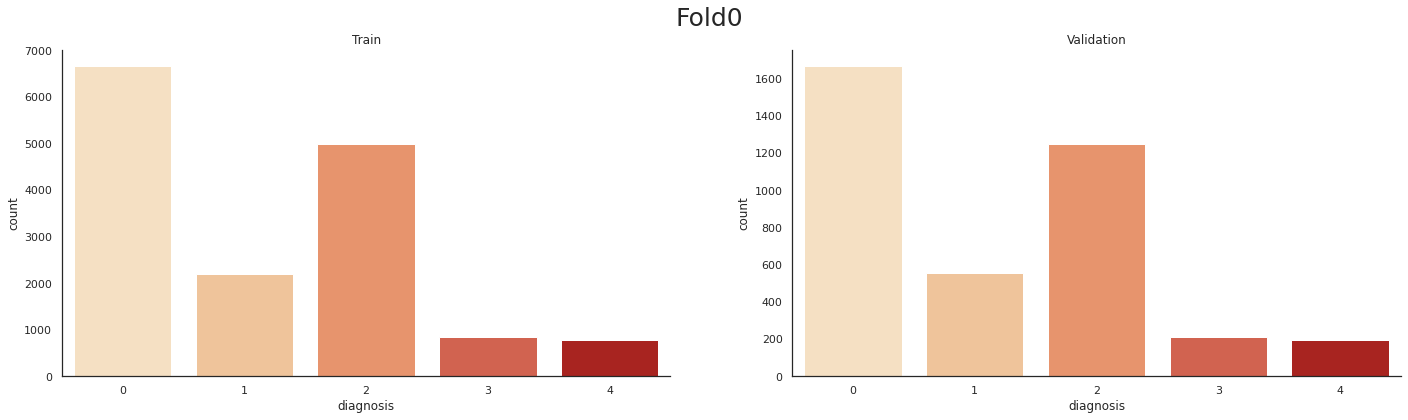

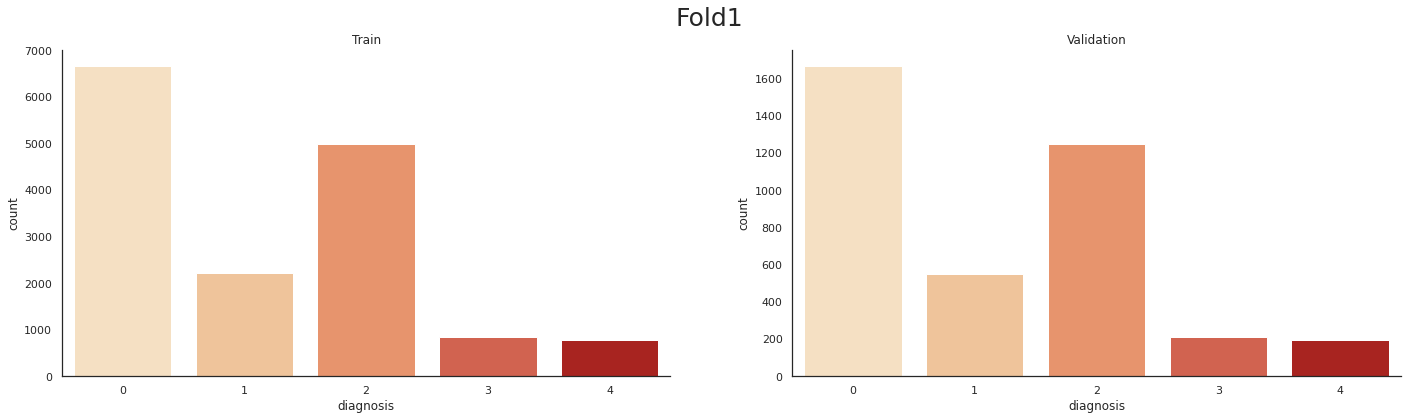

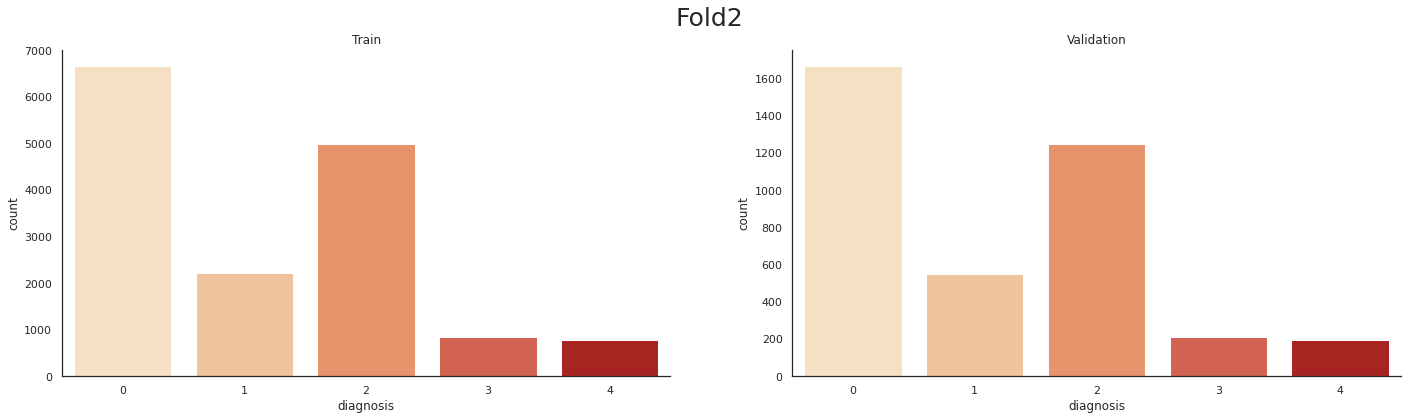

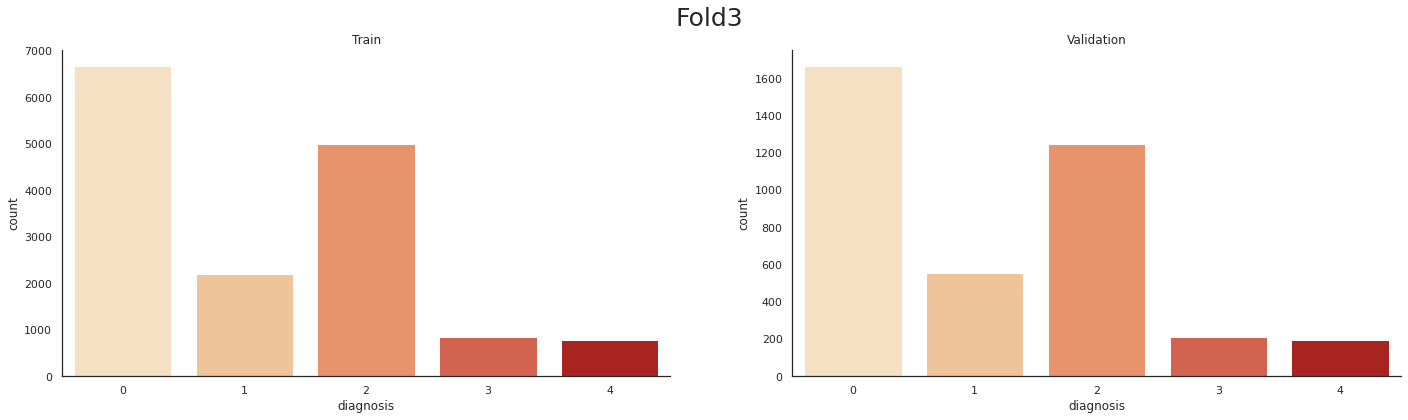

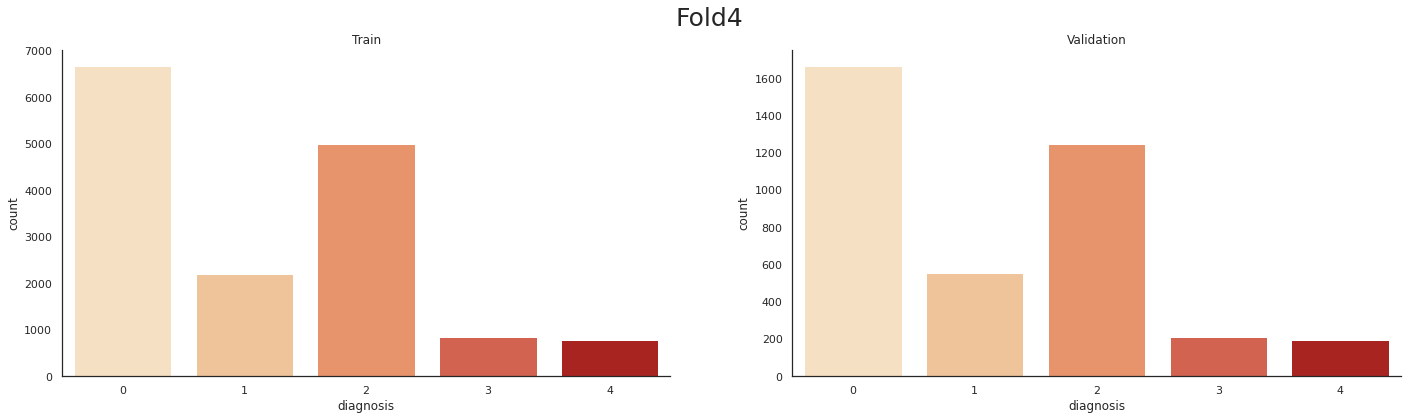

In [4]:
for fold_n, (train_index, val_index) in enumerate(folds.split(train_df, train_df['diagnosis'])):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', figsize=(24, 6))
    fig.suptitle('Fold%s'%fold_n, fontsize=25)    
    sns.countplot(x="diagnosis", data=train_df[train_df[('fold_%s' % fold_n)] == 'train'], palette="OrRd", ax=ax1).set_title('Train')
    sns.countplot(x="diagnosis", data=train_df[train_df[('fold_%s' % fold_n)] == 'validation'], palette="OrRd", ax=ax2).set_title('Validation')
    sns.despine()
    plt.show()

# Output 5-fold set

In [5]:
train_df = train_df.loc[:, ~train_df.columns.str.contains('level_0')]
train_df = train_df.loc[:, ~train_df.columns.str.contains('index')]
train_df.to_csv('../output/data_5_fold.csv', index=False)
print('Number of train samples: ', train_df[train_df[('fold_%s' % fold_n)] == 'train'].shape[0])
print('Number of validation samples: ', train_df[train_df[('fold_%s' % fold_n)] == 'validation'].shape[0])
display(train_df.head())

Number of train samples:  15505
Number of validation samples:  3876


,id_code,diagnosis,data,fold_0,fold_1,fold_2,fold_3,fold_4
0,11121_right.jpeg,0,2,train,train,train,train,validation
1,30914_right.jpeg,0,2,validation,train,train,train,train
2,21916_right.jpeg,0,2,train,train,train,train,validation
3,22283_right.jpeg,0,2,validation,train,train,train,train
4,13832_right.jpeg,0,2,validation,train,train,train,train
